In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels. api as sm
import statsmodels.formula.api as smf
import sys, os
import ast
import re
import seaborn as sns
import inspect

In [68]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classifiers = {'NB':GaussianNB(), 'QDA':QuadraticDiscriminantAnalysis(), 'SVM': SVC(), 'Trees':RandomForestClassifier()}

In [3]:
CURRENTDIR = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))))
results = pd.read_excel(os.path.join(CURRENTDIR,"data/extracted_data_3.xlsx"))

In [4]:
# 0 = 'T'; 'M' = 1; 'R':2
human = {1:	0, 2:	1, 3:	1, 4:	0, 5:	0, 6:	0, 7:	1, 8:	1, 9:	1, 10:	0, 11:	1, 12:	1, 13:	1, 14:	1, 15:	0, 16:	1, 17:	1, 18:	1, 19:	1, 20:	1, 21:	1, 22:	0, 23:	1, 24:	1, 25:	1}
results['human'] = results.apply(lambda x: human[x.locutor] if x.conv == 1 else 2, axis=1)

# Loading sklearn Scalers & PCA

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
results.columns

Index(['file', 'locutor', 'block', 'conv', 'it', 'conv_id_unif', 'tier',
       'content_complexity', 'count_syllables', 'extract_sentiment',
       'extract_subjectivity', 'lexical_richness', 'linguistic_complexity',
       'mean_ipu_lgth', 'nb_ipu', 'nb_tokens', 'nratio_discourse',
       'nratio_feedback', 'nratio_filled_pause', 'qt_discourse', 'qt_feedback',
       'qt_filled_pause', 'ratio_discourse', 'ratio_feedback',
       'ratio_filled_pause', 'ratio_silence_lgth', 'speech_rate',
       'speech_rate_2', 'speech_rate_max', 'speech_rate_mean',
       'speech_rate_min', 'speech_rate_min4', 'sum_ipu_lgth', 'extract_text',
       'human'],
      dtype='object')

In [7]:
int_cols = ['count_syllables', 
       'lexical_richness', 'linguistic_complexity', 'content_complexity','mean_ipu_lgth', 'nb_ipu',
       'nb_tokens', 'qt_discourse', 'qt_feedback', 'qt_filled_pause', 'nratio_discourse', 'nratio_feedback', 'nratio_filled_pause',
       'speech_rate_min4', 'speech_rate_mean', 'sum_ipu_lgth']
labels = 'locutor'
select_tier = 'participant'

In [14]:
remove_loc = [1,4,19,23]
results = results[~results.locutor.isin(remove_loc)]

## Participant

In [156]:
X_H = results[(results.tier == select_tier) & (results.conv == 1)][int_cols]
X_R = results[(results.tier == select_tier) & (results.conv == 2)][int_cols]
y_H = results[(results.tier == select_tier) & (results.conv == 1)][labels]
y_R = results[(results.tier == select_tier) & (results.conv == 2)][labels]

In [157]:
X_Hs = StandardScaler().fit_transform(X_H)

In [158]:
X_Hs.shape

(252, 16)

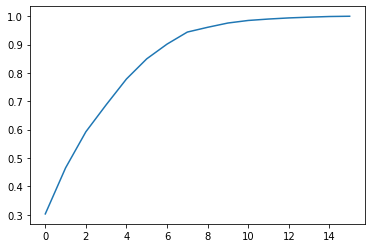

In [159]:
pca = PCA()
pca.fit(X_Hs)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [143]:
np.cumsum(pca.explained_variance_ratio_)

array([0.30265125, 0.46504061, 0.59247362, 0.68755339, 0.77862807,
       0.8497894 , 0.90169533, 0.94417654, 0.9609896 , 0.97607793,
       0.98511648, 0.99013184, 0.99408141, 0.99674998, 0.99903436,
       1.        ])

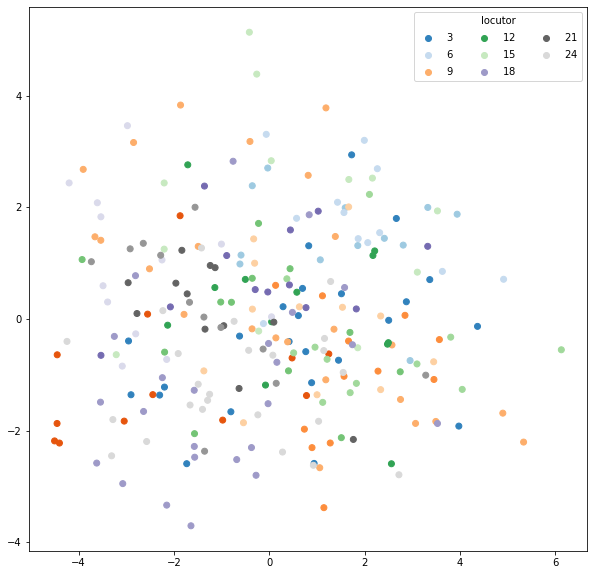

In [144]:
X_Hss = pca.transform(X_Hs)
fig, ax = plt.subplots(figsize = (10,10))
scat = ax.scatter(X_Hss[:,0], X_Hss[:,1], c=y_H, cmap=plt.get_cmap('tab20c'))
legend = ax.legend(*scat.legend_elements(), loc="best", title=labels, ncol=3)
plt.show()

First two PCA components represent a very low share of the total variance still some patterns appear.

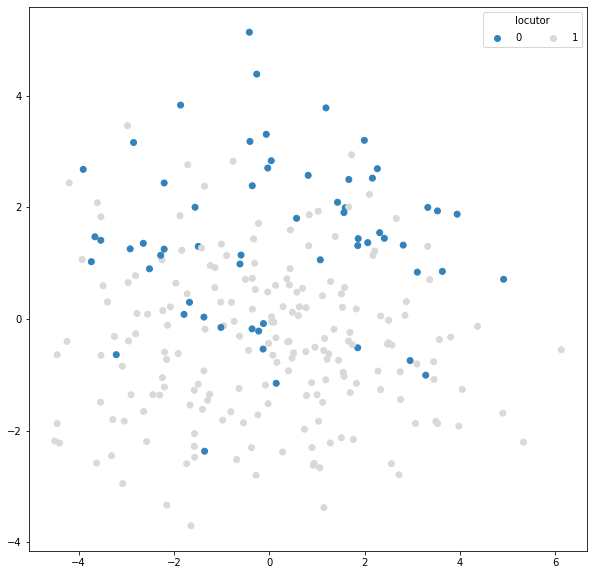

In [145]:
y_HH = results[(results.tier == 'participant') & (results.conv == 1)]['human']
fig, ax = plt.subplots(figsize = (10,10))
scat = ax.scatter(X_Hss[:,0], X_Hss[:,1], c=y_HH, cmap=plt.get_cmap('tab20c'))
legend = ax.legend(*scat.legend_elements(), loc="best", title=labels, ncol=3)
plt.show()

Plotting all data together:

In [146]:
df_Hss = pd.DataFrame(X_Hss)
df_Hss['locutor'] = y_H.to_list()
df_Hss['gender'] = y_HH.to_list()
df_gp = df_Hss.groupby(by=['locutor', 'gender']).agg('mean').reset_index()
df_gp.head()

locutor  gender         0         1         2         3         4  \
0        2       1 -0.817060 -1.089403  1.355703 -0.423519 -0.337538   
1        3       1  2.183312  0.416173 -0.353219  1.111399 -1.510315   
2        5       0  1.531935  1.459031  0.709203 -0.988768  0.552467   
3        6       0  1.871489  1.738361 -0.215684  0.232830 -0.306265   
4        7       1 -2.182948 -1.056925  0.195530 -0.771971 -0.147706   

          5         6         7         8         9        10        11  \
0 -0.738185 -0.728195 -0.556854  0.183917  0.091628 -0.172927 -0.072144   
1  0.620677  0.182775 -0.068668 -0.273720  0.037432 -0.252079  0.044200   
2 -0.229728  1.002610 -0.461097  0.323963 -0.218432  0.127810 -0.080371   
3 -0.372383 -0.331170 -0.025817 -0.191202  0.263555 -0.027076  0.027622   
4  0.164107  0.184089  0.151351  0.196298 -0.028461 -0.171704 -0.123665   

         12        13        14        15  
0 -0.005097 -0.018865 -0.028431  0.071829  
1 -0.006199 -0.060413 -0.089719  0.040206  
2 -0.023243  0.034500 -0.039168  0.013959  
3 -0.078685 -0.000247  0.086279  0.029803  
4  0.025236 -0.120816 -0.095998  0.017069

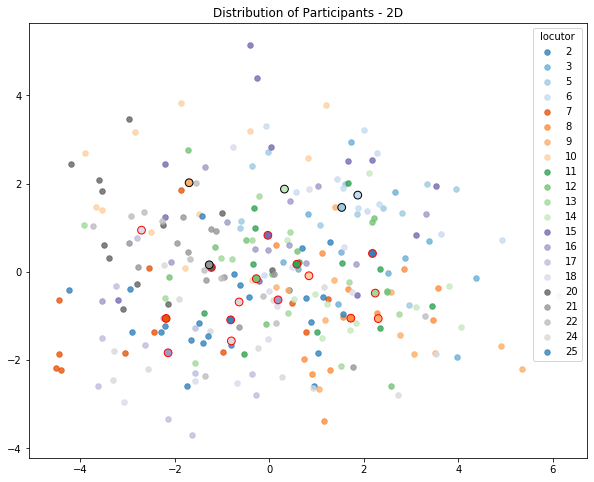

In [148]:
fig, ax = plt.subplots(figsize = (10,8))
cmap = plt.cm.get_cmap('tab20c')
colors = cmap(np.arange(cmap.N))
# plotting all samples
for it, loc in enumerate(list(set(range(1,26)) - set(remove_loc))):
    #scat = ax.scatter(X_Hss[:,0], X_Hss[:,1], c=y_H, cmap=plt.get_cmap('tab20c'), label=y_H)
    ax.scatter(df_Hss[df_Hss.locutor == loc][0], df_Hss[df_Hss.locutor == loc][1], label=str(loc), color=colors[it%cmap.N], s=30, alpha=0.8)
    #legend = ax.legend(*scat.legend_elements(), loc="best", title=labels, ncol=3)
ax.legend(loc="best", title=labels)
# corresponding mean
scat = ax.scatter(df_gp[0], df_gp[1], c=df_gp['locutor'], s=60, edgecolor=df_gp['gender'].apply(lambda x: 'red' if x else 'black'), cmap=plt.get_cmap('tab20c'))
plt.title('Distribution of Participants - 2D')
plt.show()

### Hierarchical Clustering

In [24]:
y_H2 = results[(results.tier == select_tier) & (results.conv == 1)].apply(lambda x: "{}_{}".format(x.locutor, x.conv_id_unif), axis=1).values

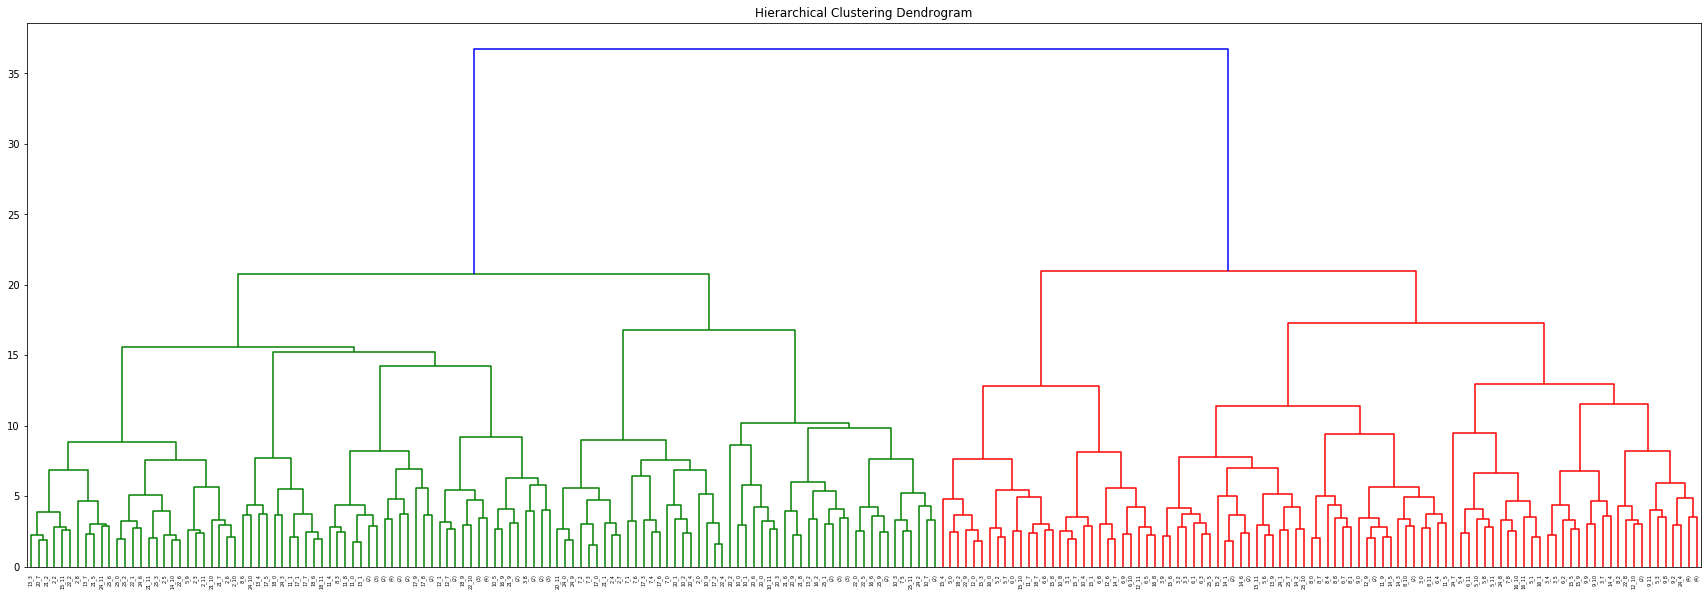

In [25]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, index, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0]) 
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples: 
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float) 
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, labels=index, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pd.DataFrame(X_Hss, index=y_H2))
_ = plt.subplots(figsize=(30,10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram 
plot_dendrogram(model, y_H2, truncate_mode='level', p=8) 
plt.show()

Conclusion: some individual clusters

### Testing classification

In [115]:
scaler = StandardScaler().fit(X_H)
X_Hs = scaler.transform(X_H)
pca = PCA()
pca.fit(X_Hs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [120]:
# changing df_Hss slightly
df_Hss = pd.DataFrame(pca.transform(scaler.transform(results[(results.tier == 'participant')][int_cols])))
df_Hss['locutor'] = results[(results.tier == 'participant')]['human'].tolist()
df_gp = df_Hss.groupby(by=['locutor']).agg('mean').reset_index()
df_gp.head()

locutor         0         1         2         3         4         5  \
0        0  0.151279  1.449893  0.138624 -0.090446 -0.141201 -0.021497   
1        1 -0.047275 -0.453091 -0.043320  0.028264  0.044125  0.006718   
2        2 -0.404584 -0.885874 -0.009624  0.463985 -0.336620 -0.003208   

          6         7         8         9        10        11        12  \
0  0.021677 -0.168458  0.157895  0.027427  0.015943  0.000733 -0.009865   
1 -0.006774  0.052643 -0.049342 -0.008571 -0.004982 -0.000229  0.003083   
2 -0.602143  0.466621 -0.028296  0.102871 -0.001522  0.008688  0.030281   

         13        14        15  
0  0.025953  0.016807  0.002545  
1 -0.008110 -0.005252 -0.000795  
2 -0.071562 -0.000539 -0.002705

NB 0.6666666666666666
QDA 0.5952380952380952
SVM 0.6428571428571429
Trees 0.5952380952380952


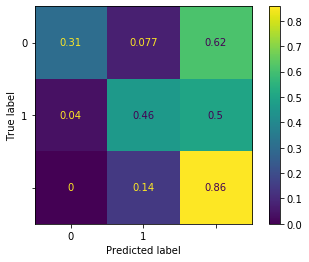

In [121]:
X_train, X_test, y_train, y_test = train_test_split(df_Hss[[c for c in df_Hss.columns if c != 'locutor']], df_Hss.locutor) 
for i, (k, clf) in enumerate(classifiers.items()):
    clf.fit(X_train, y_train)
    print(k, clf.score(X_test, y_test))

cm = confusion_matrix(y_test, classifiers['SVM'].predict(X_test), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='viridis')

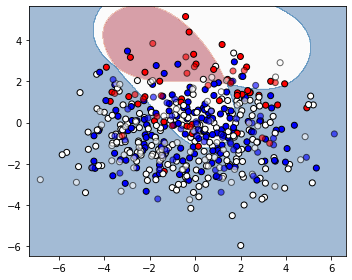

In [125]:
X = df_Hss[[c for c in df_Hss.columns if c not in ['locutor', 'gender']]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X[:,:2], df_Hss.locutor)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

clf = SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
if hasattr(clf, "decision_function"):
    Zi = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Zi = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
f = plt.figure(figsize=(5,4))    
#for i in range(0,3):
plt.contourf(xx, yy, Zi[:,2].reshape(xx.shape), cmap=cm, alpha=.4)
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['#FF0000', '#0000FF', '#FFFFFF']), edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(['#FF0000', '#0000FF', '#FFFFFF']), edgecolors='k', alpha=0.6)

plt.tight_layout()
plt.show()

## Looking at conversant - human agent

In [160]:
X_H = results[(results.tier == 'conversant') & (results.conv == 1)][int_cols]
y_H = results[(results.tier == 'conversant') & (results.conv == 1)][labels]
y_HH = results[(results.tier == 'conversant') & (results.conv == 1)]['human']


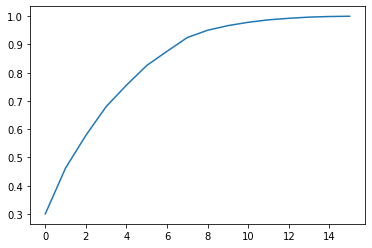

In [64]:
X_Hs = StandardScaler().fit_transform(X_H)
pca = PCA()
pca.fit(X_Hs)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

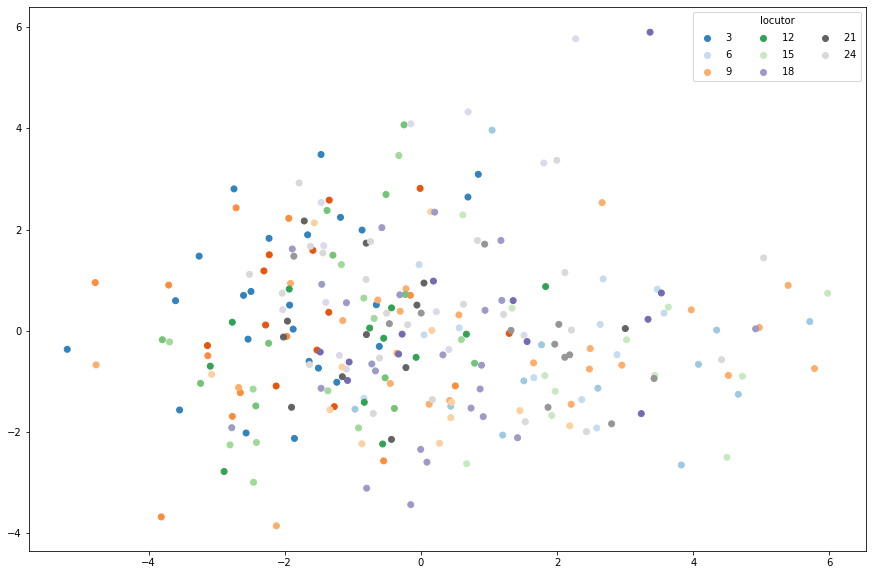

In [65]:
X_Hss = pca.transform(X_Hs)
fig, ax = plt.subplots(figsize = (15,10))
scat = ax.scatter(X_Hss[:,0], X_Hss[:,1], c=y_H, cmap=plt.get_cmap('tab20c'))
legend = ax.legend(*scat.legend_elements(), loc="best", title=labels, ncol=3)
plt.show()

Only two people taking to 24 others: way more condensed plot

Now trying out with which person that was:

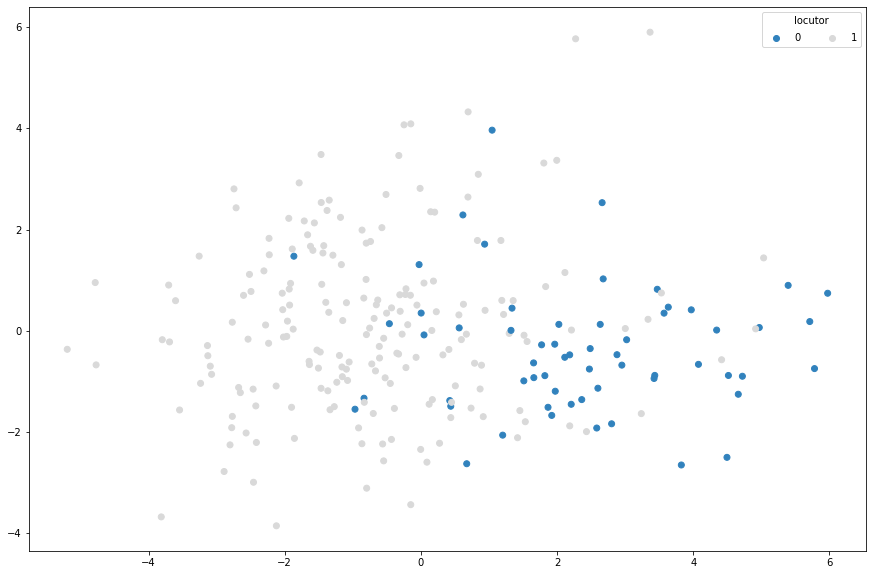

In [66]:
fig, ax = plt.subplots(figsize = (15,10))
scat = ax.scatter(X_Hss[:,0], X_Hss[:,1], c=y_HH, cmap=plt.get_cmap('tab20c'))
legend = ax.legend(*scat.legend_elements(), loc="best", title=labels, ncol=3)
plt.show()

In [67]:
y_H2 = results[(results.tier == 'conversant') & (results.conv == 1)].apply(lambda x: "{}_{}_{}".format(x.human, x.locutor, x.conv_id_unif), axis=1).values

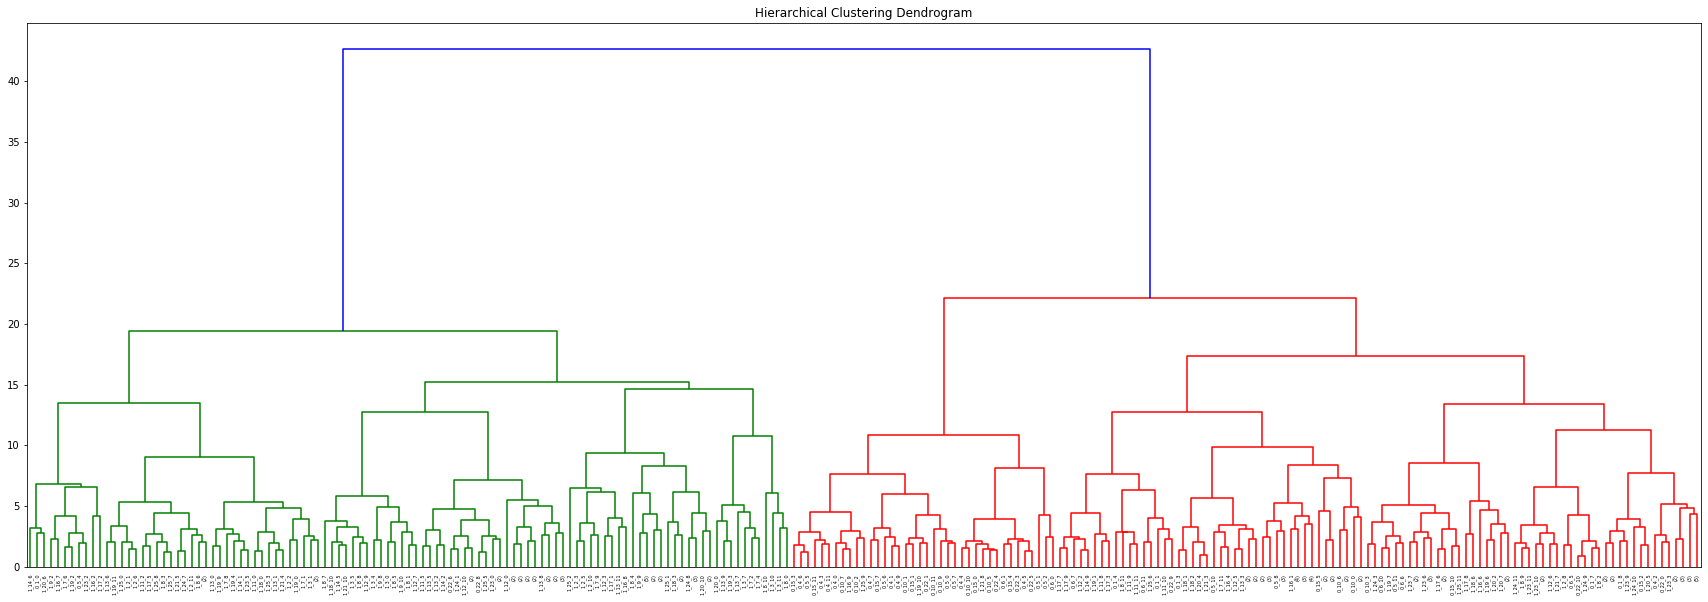

In [17]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pd.DataFrame(X_Hss, index=y_H2))
_ = plt.subplots(figsize=(30,10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram 
plot_dendrogram(model, y_H2, truncate_mode='level', p=8) 
plt.show()

In terms of participant, more evenly distributed eventhough some clusters remain.
In terms of agent, strong groupings appear.

Are those separable? (naive classifiers but pretty plots)

In [69]:
X = X_Hss # bc I don't want to adapt the code below
X_train, X_test, y_train, y_test = train_test_split(X[:,:2], y_HH)

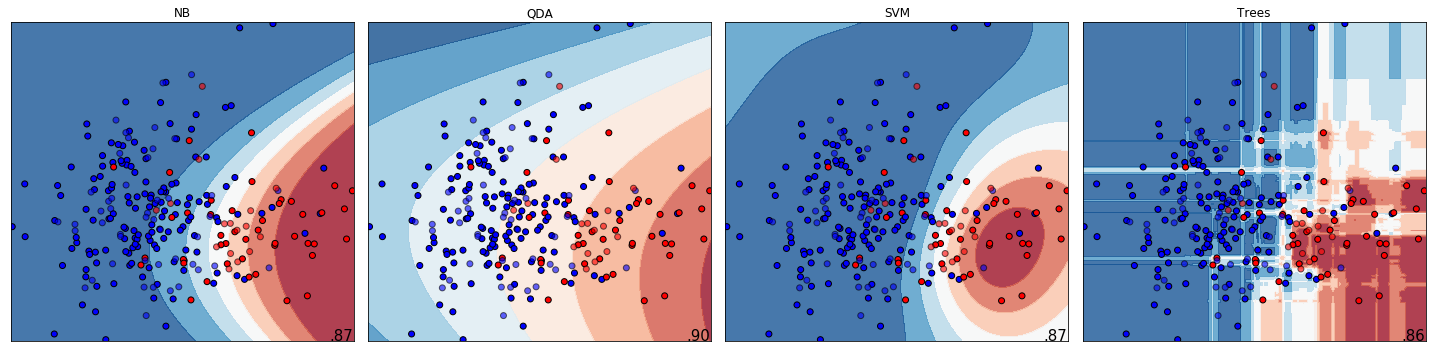

In [70]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = .02
x_min, x_max = X[:, 0].min() - .05, X[:, 0].max() + .05
y_min, y_max = X[:, 1].min() - .05, X[:, 1].max() + .05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

f = plt.figure(figsize=(20,5))
for i, (k, clf) in enumerate(classifiers.items()):
    #ax = plt.subplot(1, len(classifiers), i+1)
    ax = f.add_subplot('1{}{}'.format(len(classifiers), i+1))
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(xx.max() - .03, yy.min() + .03, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    ax.set_title(k)

plt.tight_layout()
plt.show()

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y_HH) # stratify = True
for i, (k, clf) in enumerate(classifiers.items()):
    clf.fit(X_train, y_train)
    print(k, clf.score(X_test, y_test))

NB 0.8571428571428571
QDA 0.9365079365079365
SVM 0.9206349206349206
Trees 0.873015873015873


For analysis: highly imbalanced dataset

In [72]:
y_HH.sum()/len(y_HH)

0.7619047619047619

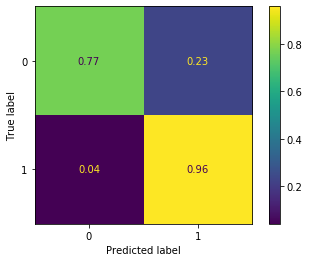

In [73]:
cm = confusion_matrix(y_test, classifiers['SVM'].predict(X_test), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='viridis')

## Adding robot occurrences to that plot:

In [151]:
scaler = StandardScaler().fit(X_H)
X_Hs = scaler.transform(X_H)
pca = PCA()
pca.fit(X_Hs)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [161]:
df_Hss = pd.DataFrame(pca.transform(scaler.transform(results[(results.tier == 'conversant')][int_cols])))
df_Hss['locutor'] = results[(results.tier == 'conversant')]['human'].tolist()
df_gp = df_Hss.groupby(by=['locutor']).agg('mean').reset_index()
df_gp.head()

locutor         0         1         2         3         4         5  \
0        0  2.000175 -0.349383  0.786439 -0.694623 -0.659050 -0.197896   
1        1 -0.625055  0.109182 -0.245762  0.217070  0.205953  0.061843   
2        2 -5.078829 -1.931037  0.529545 -1.780325 -0.770823 -0.516859   

          6         7         8         9        10        11        12  \
0 -0.503634  0.356004  0.083138 -0.124746 -0.062264 -0.036702 -0.020043   
1  0.157386 -0.111251 -0.025981  0.038983  0.019457  0.011469  0.006263   
2 -1.227326  0.940454 -0.197549  0.196339 -0.086074 -0.431927 -0.119800   

         13        14        15  
0  0.142743  0.014240 -0.093919  
1 -0.044607 -0.004450  0.029350  
2 -0.324209 -0.358987 -0.041525

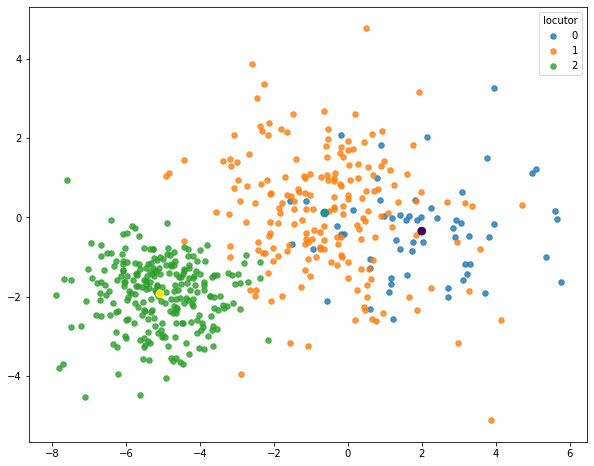

In [162]:
fig, ax = plt.subplots(figsize = (10,8))
# plotting all samples
for loc in [0,1,2]:
    ax.scatter(df_Hss[df_Hss.locutor == loc][0], df_Hss[df_Hss.locutor == loc][1], label=str(loc), s=30, alpha=0.8)
ax.legend(loc="best", title=labels)
# corresponding mean
scat = ax.scatter(df_gp[0], df_gp[1], c=df_gp['locutor'], s=60)
plt.show()

In [165]:
X_train, X_test, y_train, y_test = train_test_split(df_Hss[[c for c in df_Hss.columns if c != 'locutor']], df_Hss.locutor) # stratify = True
for i, (k, clf) in enumerate(classifiers.items()):
    clf.fit(X_train, y_train)
    print(k, clf.score(X_test, y_test))

NB 0.9126984126984127
QDA 0.9047619047619048
SVM 0.9444444444444444
Trees 0.9285714285714286


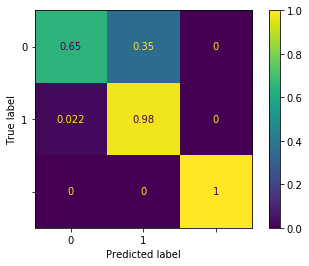

In [166]:
cm = confusion_matrix(y_test, classifiers['SVM'].predict(X_test), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='viridis')

In [167]:
df_Hss.locutor.value_counts()/df_Hss.shape[0]

2    0.500000
1    0.380952
0    0.119048
Name: locutor, dtype: float64

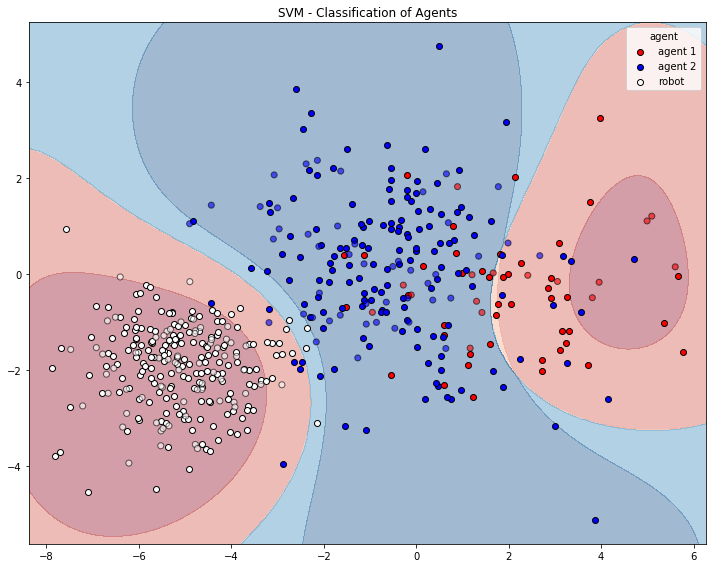

In [190]:
X = df_Hss[[c for c in df_Hss.columns if c != 'locutor']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X[:,:2], df_Hss.locutor)

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

clf = SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
if hasattr(clf, "decision_function"):
    Zi = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Zi = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
f = plt.figure(figsize=(10,8))    
#for i in range(0,3):
plt.contourf(xx, yy, Zi[:,1].reshape(xx.shape), cmap=cm, alpha=.4)
# Plot the training points
for i, (lab,c) in enumerate(zip(['agent 1', 'agent 2', 'robot'], ['#FF0000', '#0000FF', '#FFFFFF'])):
    plt.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], c=c, edgecolors='k', label=lab)
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=ListedColormap(['#FF0000', '#0000FF', '#FFFFFF']), edgecolors='k', alpha=0.6)

#plt.set_xlim(xx.min(), xx.max())
#plt.set_ylim(yy.min(), yy.max())
#plt.set_xticks(())
#plt.set_yticks(())
#plt.text(xx.max() - .03, yy.min() + .03, ('%.3f' % 0.968).lstrip('0'), size=15, horizontalalignment='right')
plt.title('SVM - Classification of Agents')
plt.legend(loc="best", title='agent')

plt.tight_layout()
plt.show()